## Task # 4 - To Explore Decision Tree Algorithm

For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly. 

Dataset : https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view?usp=sharing 

In [1]:
# Importing libraries in Python
import pandas as pd
import numpy as np
import sklearn.datasets as datasets
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import graphviz

### Reading the dataset

In [2]:
iris_df = pd.read_csv('iris.csv')
iris_df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [3]:
y = iris_df['species'].values
X = iris_df.drop('species',axis=1).values

In [4]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(120, 4) (120,)
(30, 4) (30,)


### Applying Decision Tree

In [5]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test) #predicting the class

In [6]:
# comparing predicted and actual species
df = pd.DataFrame({"Predicted":y_pred, "Actual": y_test})
df.head()

,Predicted,Actual
0,versicolor,versicolor
1,setosa,setosa
2,virginica,virginica
3,versicolor,versicolor
4,versicolor,versicolor


### Visualising the tree

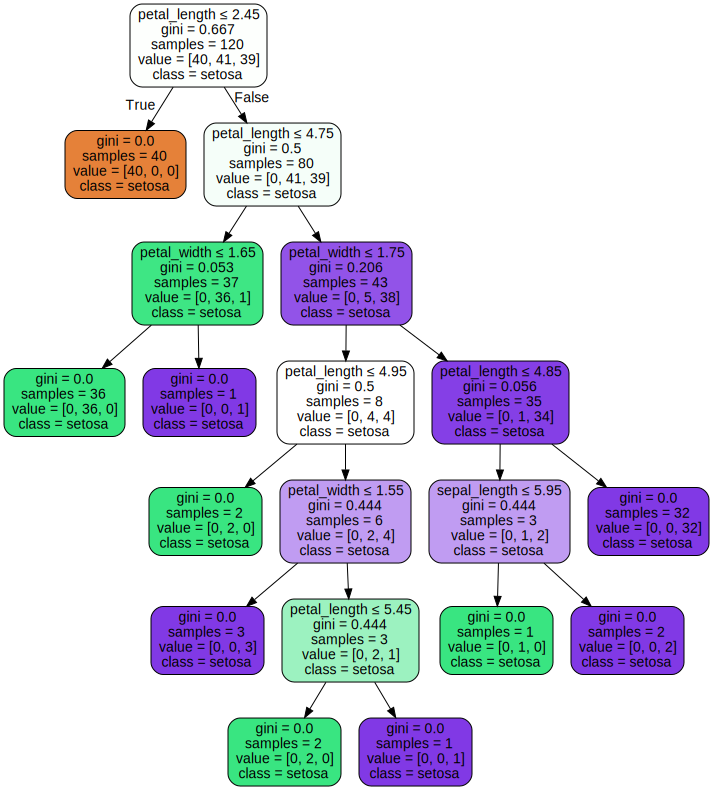

In [7]:
from sklearn import tree
dot_data = tree.export_graphviz(clf, out_file = None, feature_names=iris_df.columns[:4], class_names=y, filled=True,
                               rounded= True, special_characters= True)
graph = graphviz.Source(dot_data)
graph

### Predicting a new test data

In [8]:
X_test_new= [[7.0 ,2.8 ,1.8, 0.2]]
y_pred_new= clf.predict(X_test_new)
print(y_pred_new)

['setosa']


### Finding the accuracy

In [9]:
from sklearn import metrics
accuracy= metrics.accuracy_score(y_test, y_pred)
print("Accuracy=",accuracy)

Accuracy= 1.0
